# **다익스트라 알고리즘 (Dijkstra)**
 - 가중치가 있는 그래프에서 최단경로를 찾는데 사용한다.
 - 개인 생각인데 가중치가 있는 그래프 최단 경로 문제는 0-1 BFS 이런것보단 Dijkstra가 확실한 것같다.
 - 특징
   1. 단일 출발점 최단 경로(Single-Source Shortest Path) : <span style="color:red">**주어진 출발점에서 다른 모든 노드까지의 최단경로**</span>를 구한다.
   2. 비음수 가중치(Non-negative Weights) : 간선에서 가중치가 <span style="color:red">**음수가 아닌 경우**</span>에만 적용된다.
   3. 탐욕적 접근(Greedy Approach) : 매 단계에서 <span style="color:red">**가장 최단거리를 갖는 노드를 선택하여 경로를 확장**</span>한다.

 - 동작 과정
   1. 초기화 : 출발 노드의 거리를 <span style="color:red">**0**</span>으로 설정하고, 다른 모든 노드의 거리를 <span style="color:red">**무한대**</span>로 설정한다.
   2. 방문하지 않은 노드 중 최단거리를 가진 노드 선택 : 현재 노드에서 <span style="color:red">**인접한 모든 노드의 거리를 업데이트**</span>한다.
   3. 거리 업데이트 : 현재 노드와 인접한 노드 간의 거리를 계산하여 <span style="color:red">**더 짧은 경로가 발견되면 거리를 업데이트**</span>한다.
   4. 반복 : 모든 노드를 방문할 때까지 2번과 3번 단계를 반복

   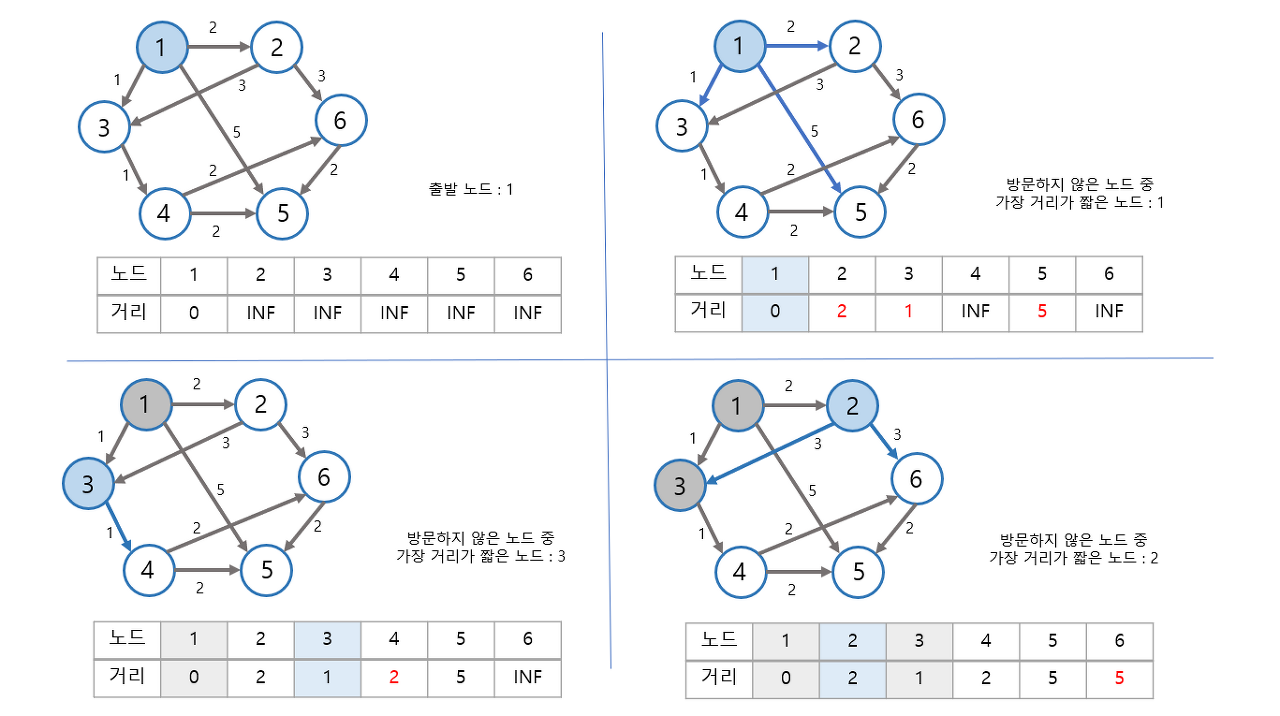

   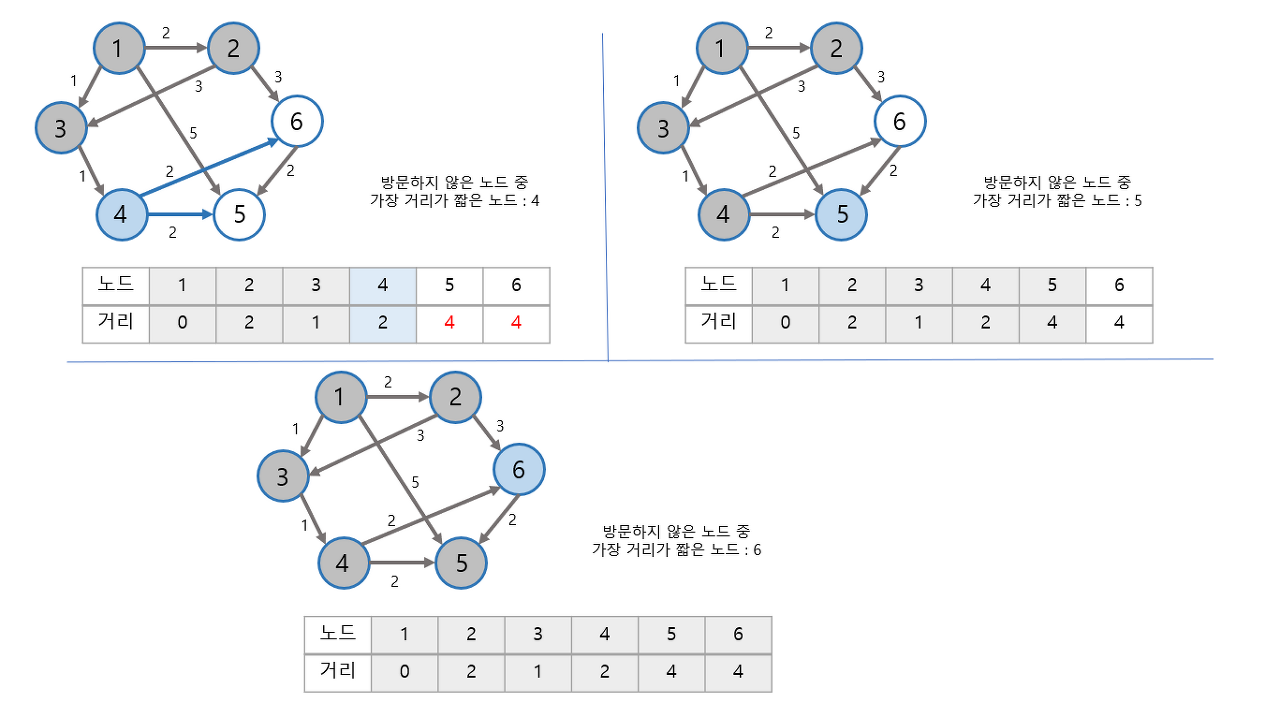

#### **다익스트라 예제 for문 구현**
 - 전체 <span style="color:red">**노드의 개수가 5000개 이하**</span>라면 이 방법으로 해결가능. 노드의 개수가 10000개 이상이라면 개선된 다익스트라 알고리즘 사용

In [ ]:
# 방문하지 않은 노드 중에서 가장 최단거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 # 최단거리가 짧은 노드(인덱스)
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True

    for i in graph[start]:
        distance[i[0]] = i[1]

    # 시작 노드를 제외한 전체 n - 1개의 노드에 대한 반복
    for _ in range(n - 1):
        # 현재 최단거리가 가장 짧은 노드를 꺼내서 방문 처리
        now = get_smallest_node()
        visited[now] = True

        for i in graph[now]:
            cost = distance[now] + i[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost

INF = int(1e9)

n, m = map(int, input().split())
start = int(input())
graph = [[] for _ in range(n + 1)]
visited = [False for _ in range(n + 1)]
distance = [INF for _ in range(n + 1)]

# 간선정보 입력받기
for _ in range(m):
    a, b, w = map(int, input().split())
    graph[a].append((b, w))

dijkstra(start)

for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(Infinity)이라고 출력
    if distance[i] == INF:
        print('Infinity', end=' ')
    else:
        print(distance[i], end=' ')
# 0 2 3 1 2 4 

#### **다익스트라 예제 Heap 구현**
 - heapq.heappush(리스트, 값) : 리스트에 값을 삽입
 - heapq.heappop(리스트) : 리스트에서 가장 작은 값을 pop

In [ ]:
import heapq

def dijkstra(start):
    q = []
    # 시작 노드로 가기위한 최단경로는 0으로 설정하여 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0

    while q:
        # 가장 최단거리인 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리됐다면 skip
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거치면 이동 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

INF = int(1e9)

n, m = map(int, input().split())
start = int(input())
graph = [[] for _ in range(n + 1)]
distance = [INF for _ in range(n + 1)]

# 간선정보 입력받기
for _ in range(m):
    a, b, w = map(int, input().split())
    graph[a].append((b, w))

dijkstra(start)

for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(Infinity)이라고 출력
    if distance[i] == INF:
        print('Infinity', end=' ')
    else:
        print(distance[i], end=' ')
# 0 2 3 1 2 4 

#### **플로이드 워셜 구현**
 - 플로이드 워셜은 <span style="color:red">**모든 지점에서 다른 모든 지점까지의 최단경로를 모두**</span> 구해야 하는 경우에 사용할 수 있다.
 $$
 D(a \Rightarrow b) = min(D(a \Rightarrow b), D(a \Rightarrow k) + D(k \Rightarrow b))
 $$
 - 위의 점화식을 3중 반복문을 이용하여 최단거리 테이블을 갱신한다.
 - A에서 B로 가는 최소비용과 A에서 K를 거쳐 B로 가는 비용을 비교하여 더 작은 값으로 갱신한다.

In [ ]:
INF = int(1e9)

n, m = map(int, input().split())
graph = [[INF for _ in range(n + 1)] for _ in range(n + 1)]

# 자기 자신 -> 자기 자신 비용은 0으로 초기화
for a in range(n + 1):
    graph[a][a] = 0

# 각 간선에 대한 정보를 입력받아 초기화
for _ in range(m):
    # a에서 b로 가는 비용은 c
    a, b, c = map(int, input().split())
    graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
# 점화식 : D(a->b) = min(D(a->b), D(a->k) + D(k->b))
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

for a in range(1, n + 1):
    for b in range(1, n + 1):
        if graph[a][b] == INF:
            print("INF")
        else:
            print(graph[a][b], end=' ')
    print()
# 0 4 8 6 
# 3 0 7 9 
# 5 9 0 4 
# 7 11 2 0 

1697번 숨바꼭질 <span style="color:green">성공</span> - 2025.04.11

In [ ]:
# 계속 메모리 초과가 뜨길래 뭔가 했는데
# q에 append 해주는 if 구문에 graph[nx] == 0 조건을 빼먹었다.
# 저걸 안써주면 방문했던 곳도 계속 q에 추가되기 때문에 메모리 터짐
# 그리고 nx를 100000까지만 확인하는 이유:
# 50000+x에서 100000에 도달하려면 
# 50000+x의 경우 x만큼 뒤로가고 곱하기 2하면 되지만
# 2(50000+x) = 100000+2x의 경우 곱하기 2하고 2x만큼 뒤로가야함.

from collections import deque

def bfs(start):
    graph[start] = 0

    q = deque()
    q.append(start)

    while q:
        x = q.popleft()

        if x == k:
            print(graph[x])
            break

        for nx in (x + 1, x - 1, x + x):
            if 0 <= nx < 100001 and graph[nx] == -1:
                graph[nx] = graph[x] + 1
                q.append(nx)

n, k = map(int, input().split())
graph = [-1 for _ in range(100001)]

bfs(n)

13913번 숨바꼭질 4 <span style="color:red">실패</span> - 2025.04.12

In [ ]:
# 블로그 포스팅할 때 처음에 제출한거 메모리 초과뜬 것도 비교하면서 설명

from collections import deque

def bfs(start):
    visited[start] = 0
    q = deque()
    q.append(start)

    while q:
        x = q.popleft()

        if x == k:
            ans = [k]
            for _ in range(visited[x]):
                tmp = ans[-1]
                ans.append(path[tmp])
            print(visited[x])
            print(*ans[::-1])
            break

        for nx in (x + 1, x - 1, x + x):
            if 0 <= nx < 100001 and visited[nx] == -1:
                visited[nx] = visited[x] + 1
                path[nx] = x
                q.append(nx)

n, k = map(int, input().split())
visited = [-1 for _ in range(100001)]
path = [0 for _ in range(100001)]

bfs(n)

14226번 이모티콘 <span style="color:red">실패</span> - 2025.04.13
 - https://ji-gwang.tistory.com/300
 - 사실 이해 잘 안됌..

In [ ]:
from collections import deque

def bfs(start):
    visited[start][0] = 0
    q = deque()
    screen = 1
    clip = 0
    q.append((screen, clip))

    while q:
        screen, clip = q.popleft()

        if screen == s:
            print(visited[screen][clip])
            break

        if screen != 0 and visited[screen][screen] == -1:
            visited[screen][screen] = visited[screen][clip] + 1
            q.append((screen, screen))

        if clip != 0 and screen + clip <= s and visited[screen + clip][clip] == -1:
            visited[screen + clip][clip] = visited[screen][clip] + 1
            q.append((screen + clip, clip))
            
        if screen != 0 and visited[screen - 1][clip] == -1:
            visited[screen - 1][clip] = visited[screen][clip] + 1
            q.append((screen - 1, clip))

s = int(input())
visited = [[-1 for _ in range(s + 1)] for _ in range(s + 1)]

bfs(1)

# for i in range(s + 1):
#     print(*visited[i])

13549번 숨바꼭질 3 <span style="color:red">실패</span> - 2025.04.14
 - https://www.acmicpc.net/board/view/38887#comment-69010
 - https://www.acmicpc.net/board/view/149983
 - https://velog.io/@clevelog/%EB%B0%B1%EC%A4%80-13549.-%EC%88%A8%EB%B0%94%EA%BC%AD%EC%A7%883-%ED%8C%8C%EC%9D%B4%EC%8D%AC

In [ ]:
# dijkstra
import heapq

def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start))
    distance[start] = 0

    while q:
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        for next in (now + 1, now - 1, now * 2):
            if 0 <= next <= 100000:
                cost = dist
                if next != now * 2:
                    cost = dist + 1
                if cost < distance[next]:
                    distance[next] = cost
                    q.append((cost, next))

n, k = map(int, input().split())
distance = [int(1e10) for _ in range(100001)]

dijkstra(n)

print(distance[k])

# 0-1 BFS


1261번 알고스팟 <span style="color:red">실패</span> - 2025.04.15

In [ ]:
# 0-1 BFS
from collections import deque

def bfs():
    q = deque()
    q.append((0, 0))
    dist[0][0] = 0

    while q:
        x, y = q.popleft()
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < m and 0 <= ny < n and dist[nx][ny] == -1:
                if graph[nx][ny] == 1:
                    dist[nx][ny] = dist[x][y] + 1
                    q.append((nx, ny))
                else: # 0인 방을 우선적으로 탐색할 수 있도록 (appendleft를 몰랐다..)
                    dist[nx][ny] = dist[x][y]
                    q.appendleft((nx, ny)) # 존나 중요!!!!

n, m = map(int, input().split())
graph = [list(map(int, input())) for _ in range(m)]
dist = [[-1 for _ in range(n)] for _ in range(m)]

bfs()

print(dist[-1][-1])

# Dijkstra
import heapq

def dijkstra():
    q = []
    heapq.heappush(q, (0, 0, 0))
    dist[0][0] = 0

    while q:
        cost, x, y = heapq.heappop(q)
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]

        if cost > dist[x][y]:
            continue

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < m and 0 <= ny < n:
                if cost + graph[nx][ny] < dist[nx][ny]:
                    dist[nx][ny] = cost + graph[nx][ny]
                    heapq.heappush(q, (dist[nx][ny], nx, ny))

n, m = map(int, input().split())
graph = [list(map(int, input())) for _ in range(m)]
dist = [[int(1e10) for _ in range(n)] for _ in range(m)]

dijkstra()

print(dist[-1][-1])